In [34]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io.wavfile
import noisereduce as nr
import soundfile as sf
import io
import urllib.request
from scipy.io import wavfile
import pitch
import scipy
import pandas as pd

In [35]:
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 500 # Show nicely large images in this notebook

In [36]:
snd = parselmouth.Sound(r"C:\Users\sivakorn\Downloads\jvs001\jvs001\parallel100\wav24kHz16bit\VOICEACTRESS100_001.wav")

test = (r"C:\Users\sivakorn\Downloads\test3.wav")

#rate, data = wavfile.read(r"C:\Users\sivakorn\Downloads\test3.wav")
#reduced_noise = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=1.5,stationary=True)
snds = parselmouth.Sound(test)



In [37]:
#p = pitch.find_pitch(r'C:\Users\sivakorn\Downloads\test3.wav')
#print('pitch =', p)

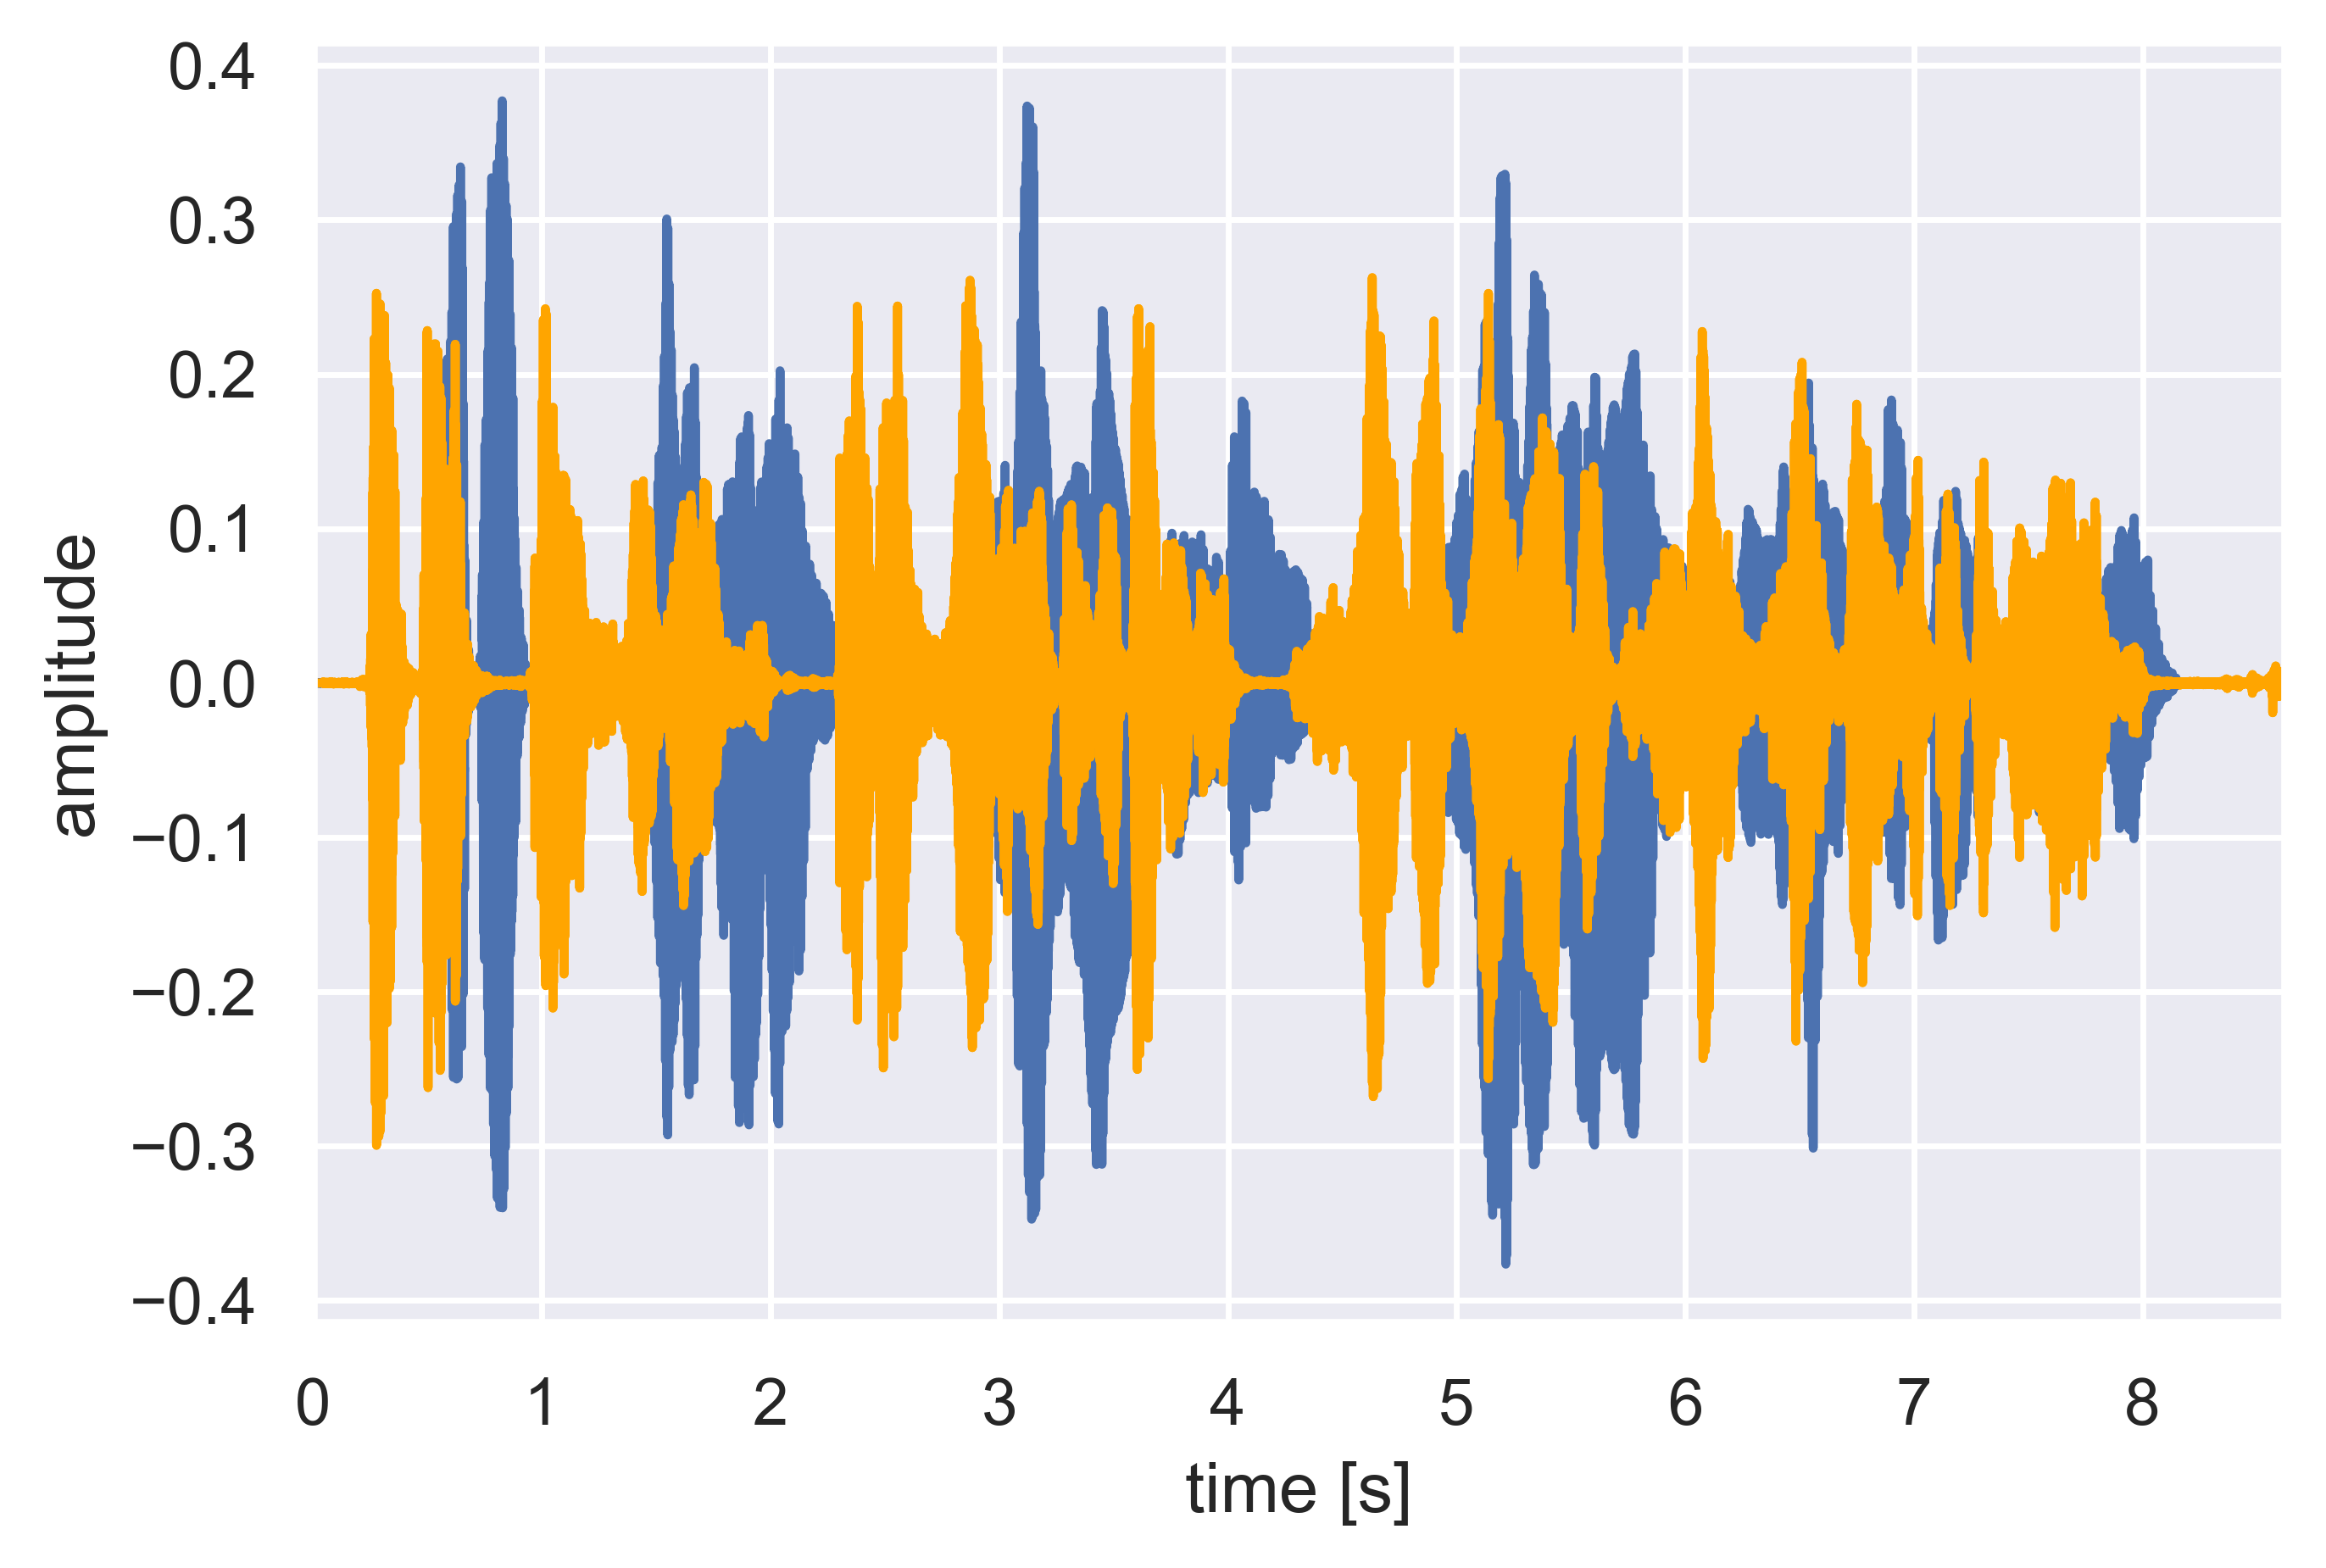

In [38]:
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.plot(snds.xs(), snds.values.T,color="orange")
plt.xlim([snd.xmin, snd.xmax])
plt.xlim([snds.xmin, snds.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [39]:
snd_part = snd.extract_part(from_time=0.9, preserve_times=True)

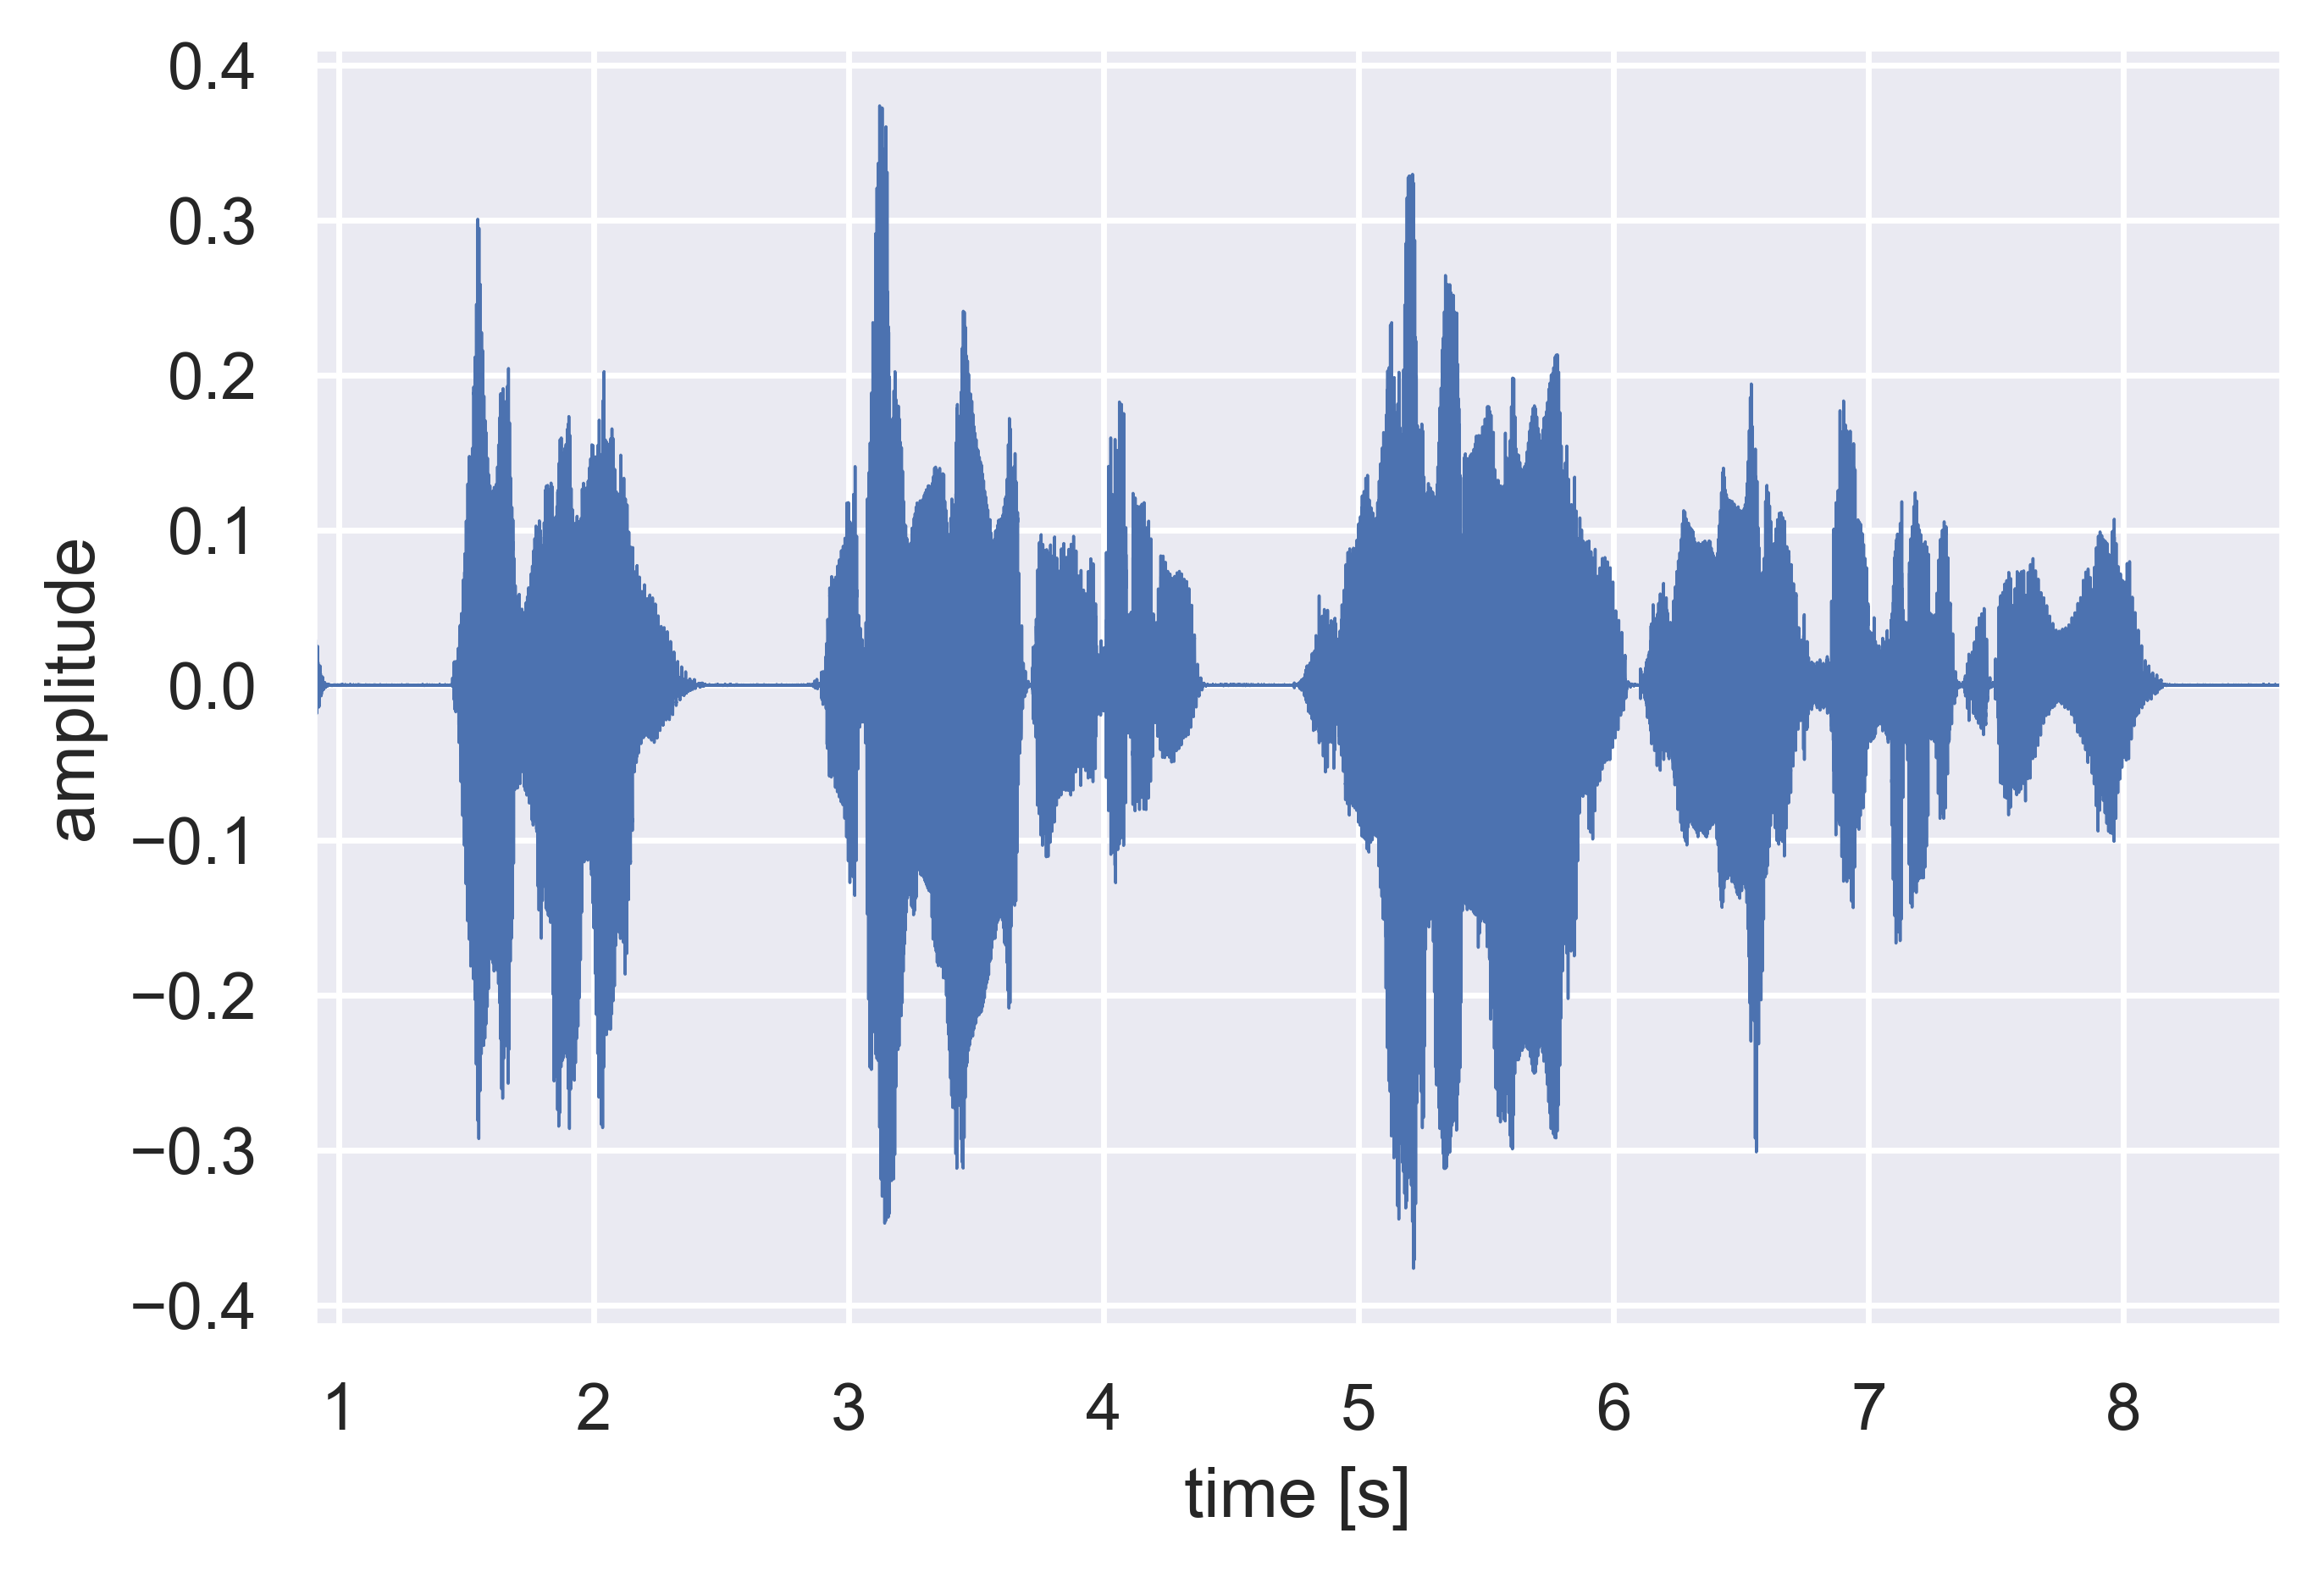

In [40]:
plt.figure()
plt.plot(snd_part.xs(), snd_part.values.T, linewidth=0.5)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [41]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

C:\Users\sivakorn\AppData\Local\Temp\ipykernel_17264\2382691446.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
C:\Users\sivakorn\AppData\Local\Temp\ipykernel_17264\2382691446.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


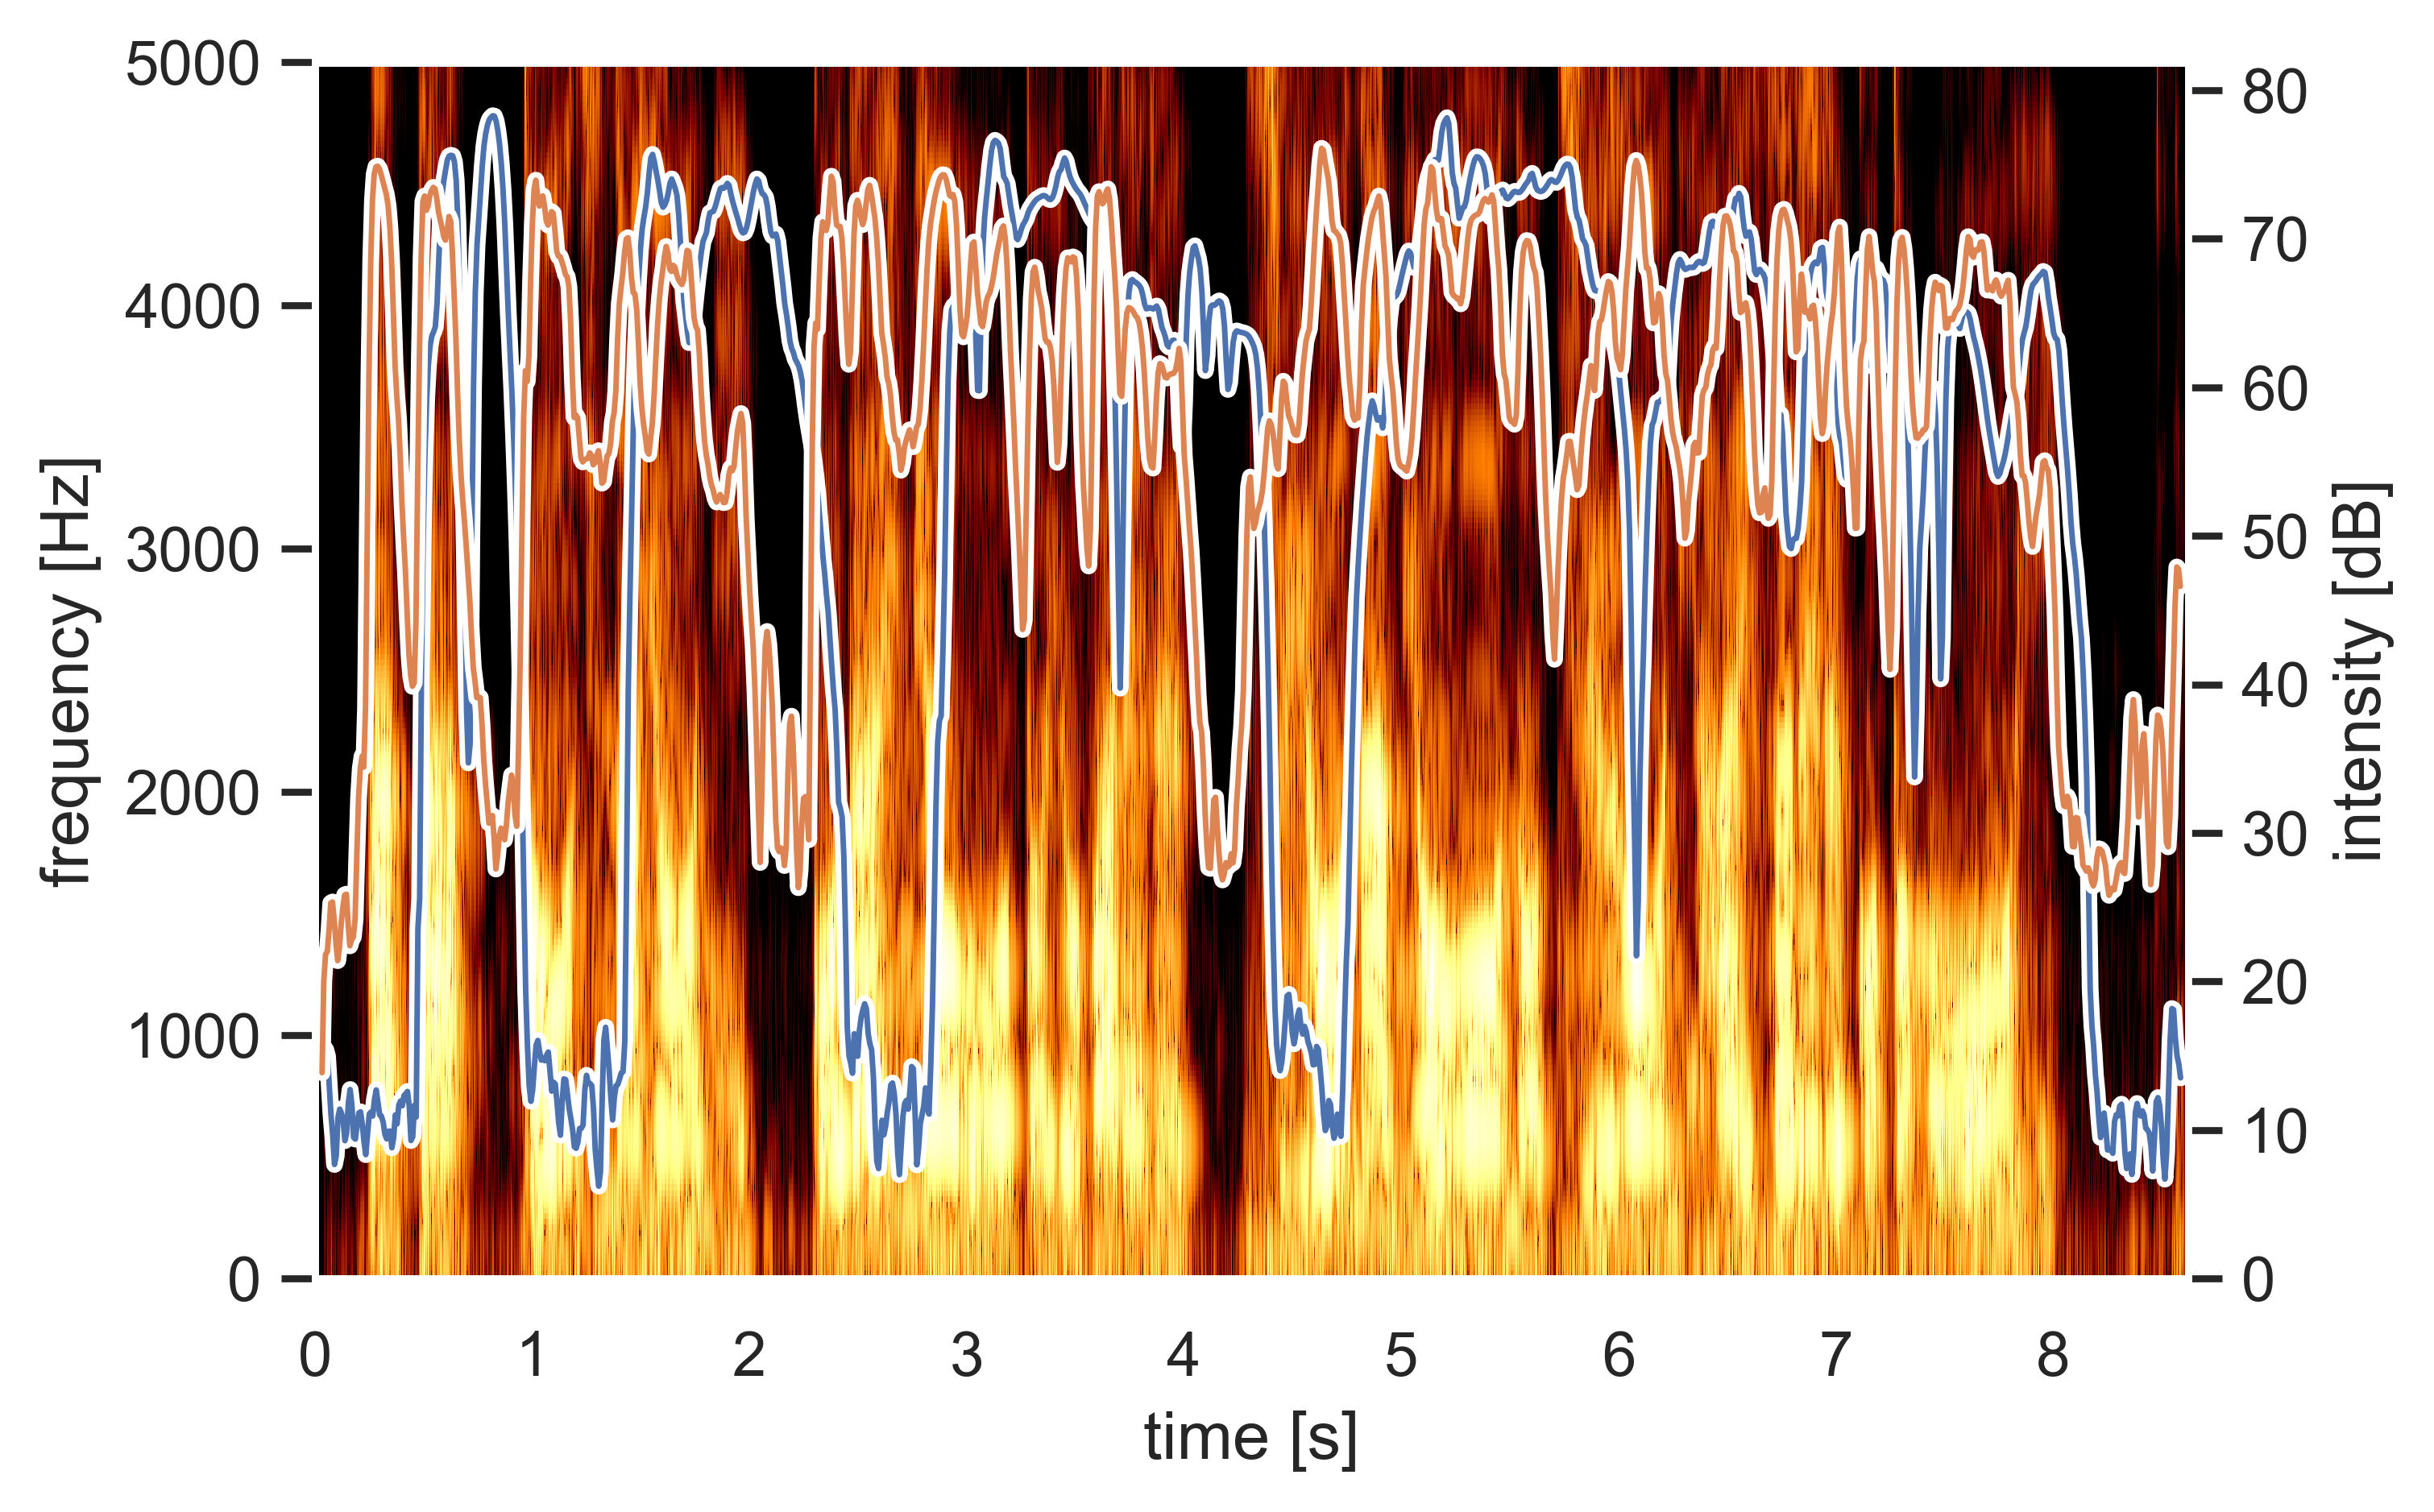

In [42]:
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
intensitys = snds.to_intensity()
spectrograms = snds.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
draw_spectrogram(spectrograms)
plt.twinx()
draw_intensity(intensity)
draw_intensity(intensitys)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

In [43]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    print(pitch_values)
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

In [86]:
import csv
import numpy as np
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']
time_pitch = pitch.xs()
list_2 = pitch_values.tolist()
list_1 = time_pitch.tolist()
dataset = list(zip(list_1,list_2))
# dictionary of lists  
dict = {'time': list_1, 'frequency': list_2 }  
       
df = pd.DataFrame(dict) 
conditions = [(df['frequency'] > 0),(df['frequency'] <1)]
phonemes = [1,0 ]
df['phoneme'] = np.select(conditions, phonemes)


# saving the dataframe 
df.to_csv('data_set.csv', index = False, header=True)
df.head(50)

,time,frequency,phoneme
0,0.020521,0.00000,0
1,0.030521,0.00000,0
2,0.040521,0.00000,0
3,0.050521,0.00000,0
4,0.060521,0.00000,0
5,0.070521,0.00000,0
6,0.080521,0.00000,0
7,0.090521,0.00000,0
8,0.100521,0.00000,0
9,0.110521,0.00000,0


In [45]:
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.08, maximum_frequency=3000)

pre_emphasized_snds = snds.copy()
pre_emphasized_snds.pre_emphasize()
spectrograms = pre_emphasized_snd.to_spectrogram(window_length=0.08, maximum_frequency=3000)

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         102.00255979
 109.63277    116.14400527 120.69721777 124.79002553 136.96514739
 145.25018713 148.11667676 151.35761951 153.64174956 155.7153924
 158.51193425 161.07825541 162.48276089 162.52567833 160.93110298
   0.           0.           0.           0.           0.
   0.         173.03706051 170.50156585 166.69791812 167.95247447
 170.69469792 172.74864959 173.85088958 174.43653948 174.02262768
 173.54210897 172.7577538

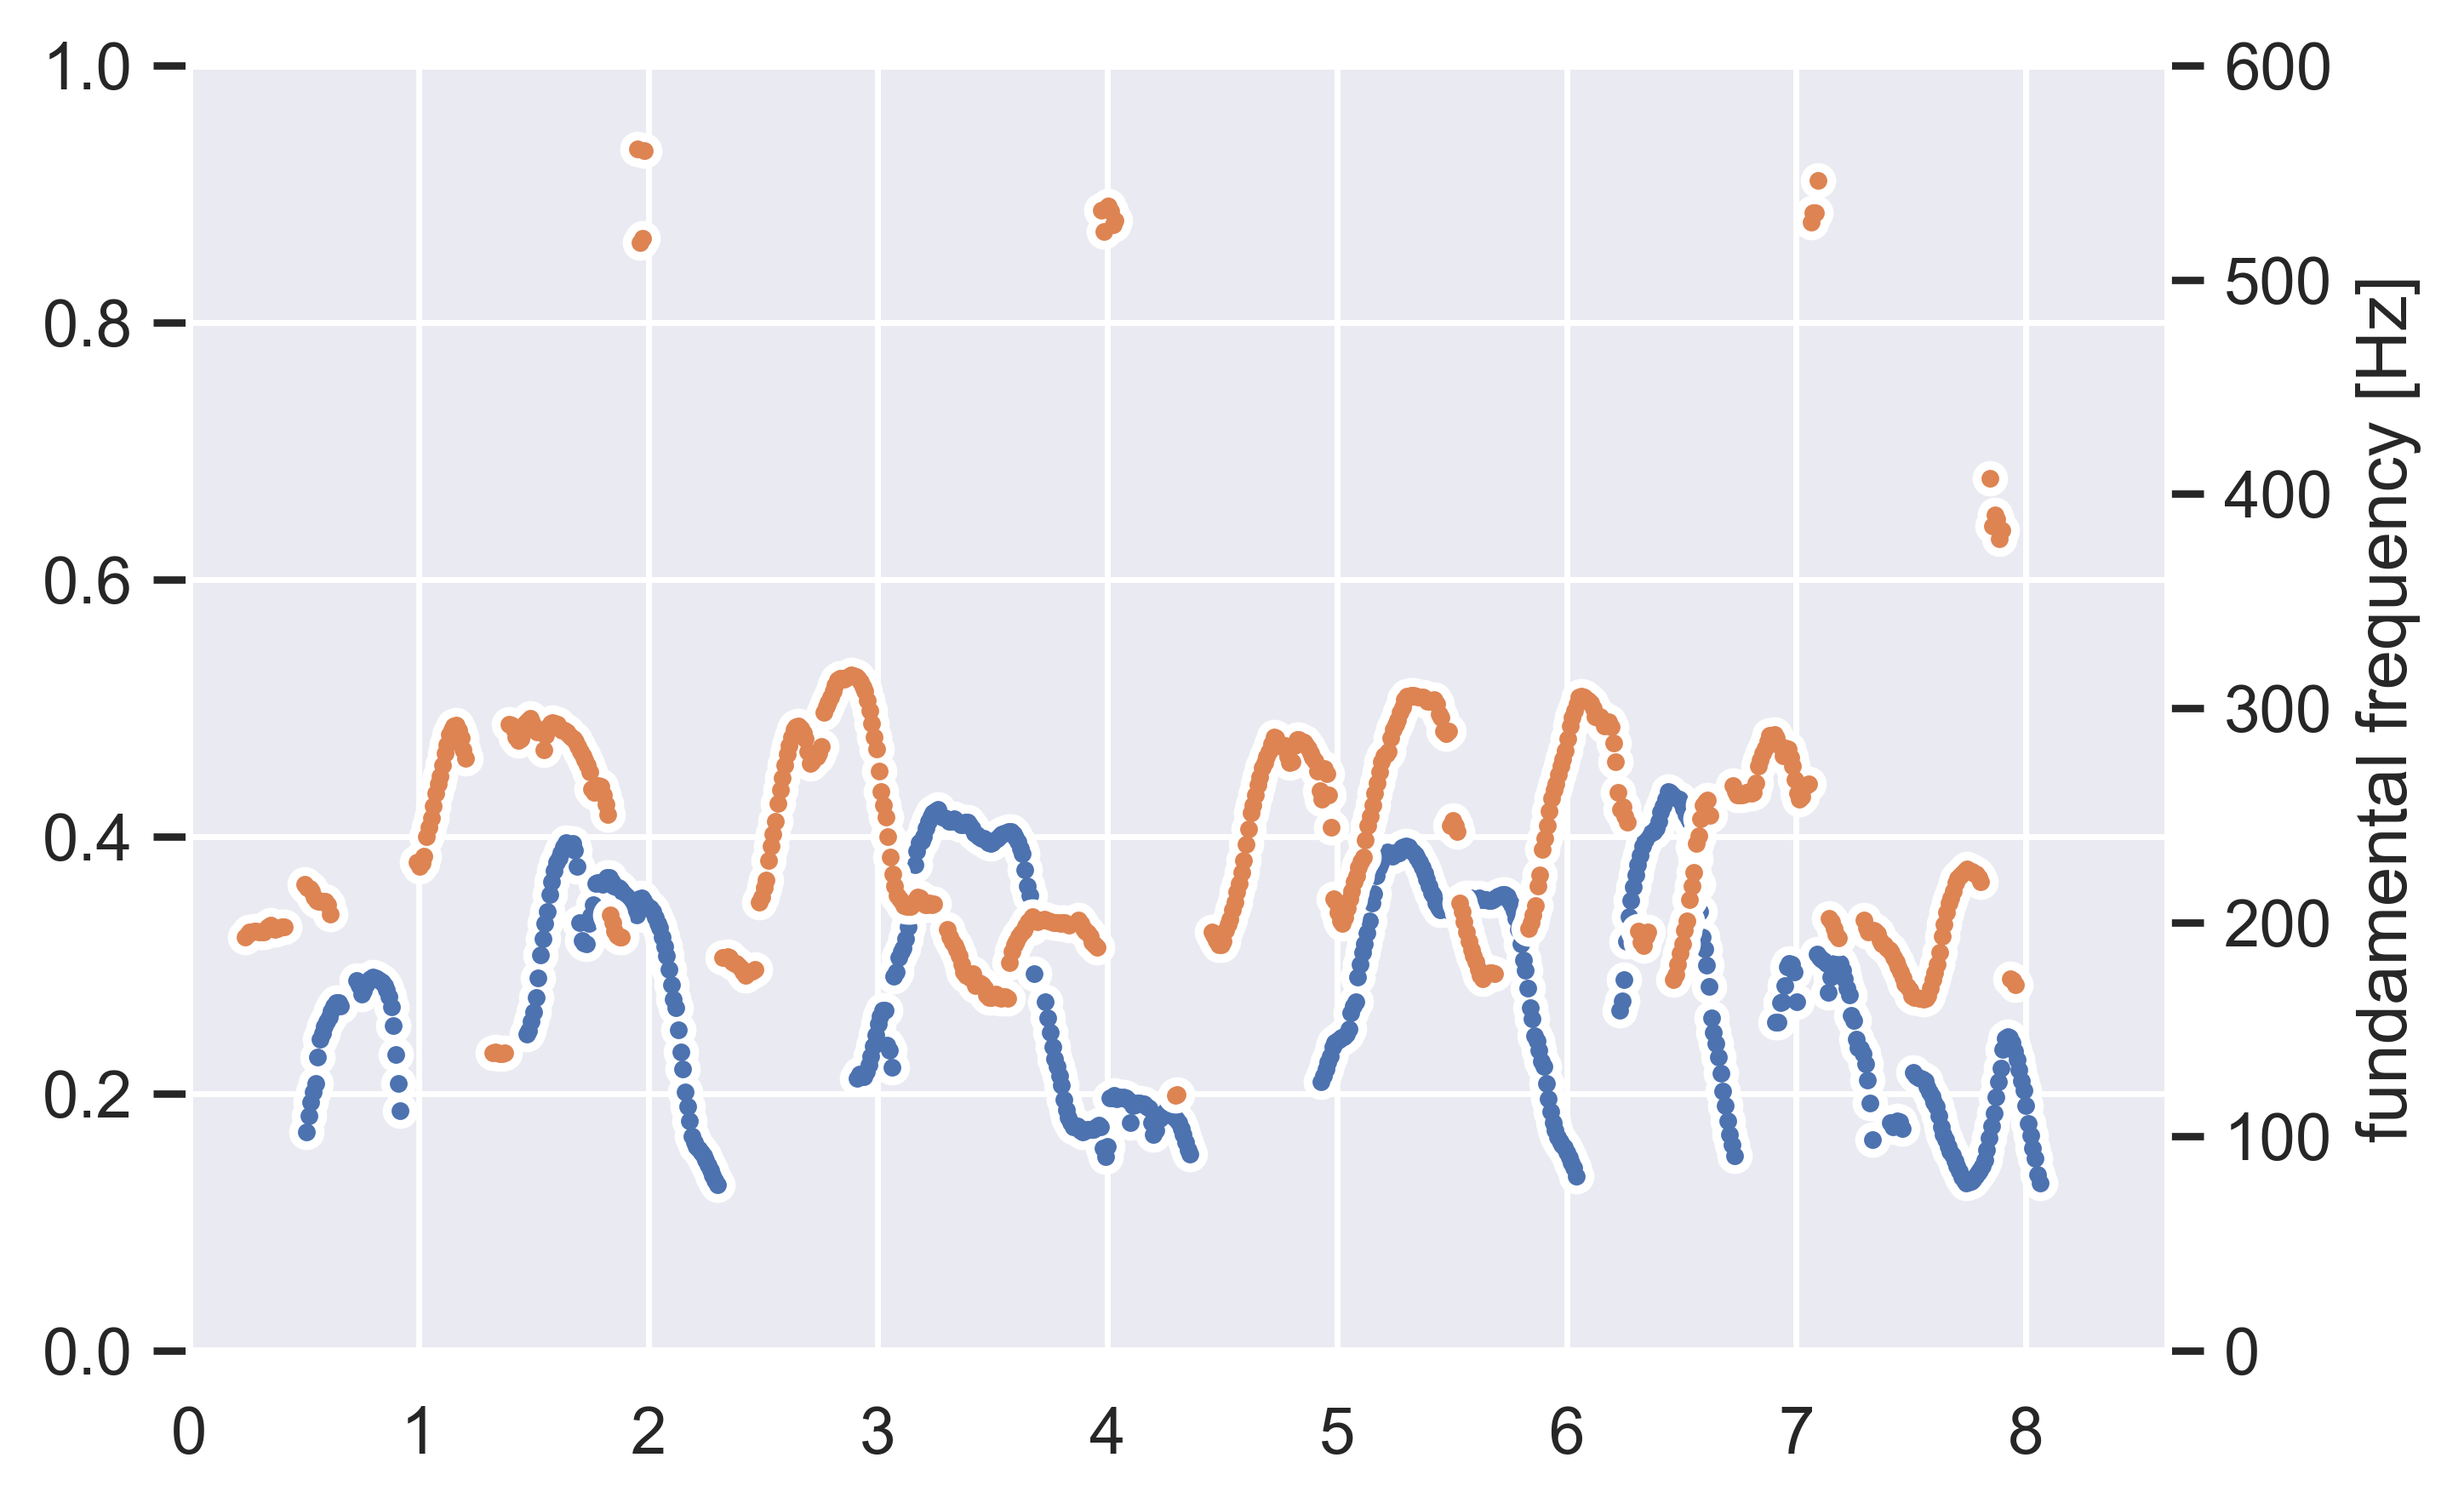

In [20]:
plt.figure()
#draw_spectrogram(spectrogram)
#draw_spectrogram(spectrograms)
plt.twinx()
draw_pitch(pitch)
draw_pitch(pitchs)
plt.xlim([snd.xmin, snd.xmax])
plt.xlim([snds.xmin, snds.xmax])
plt.show()

ValueError: object too deep for desired array

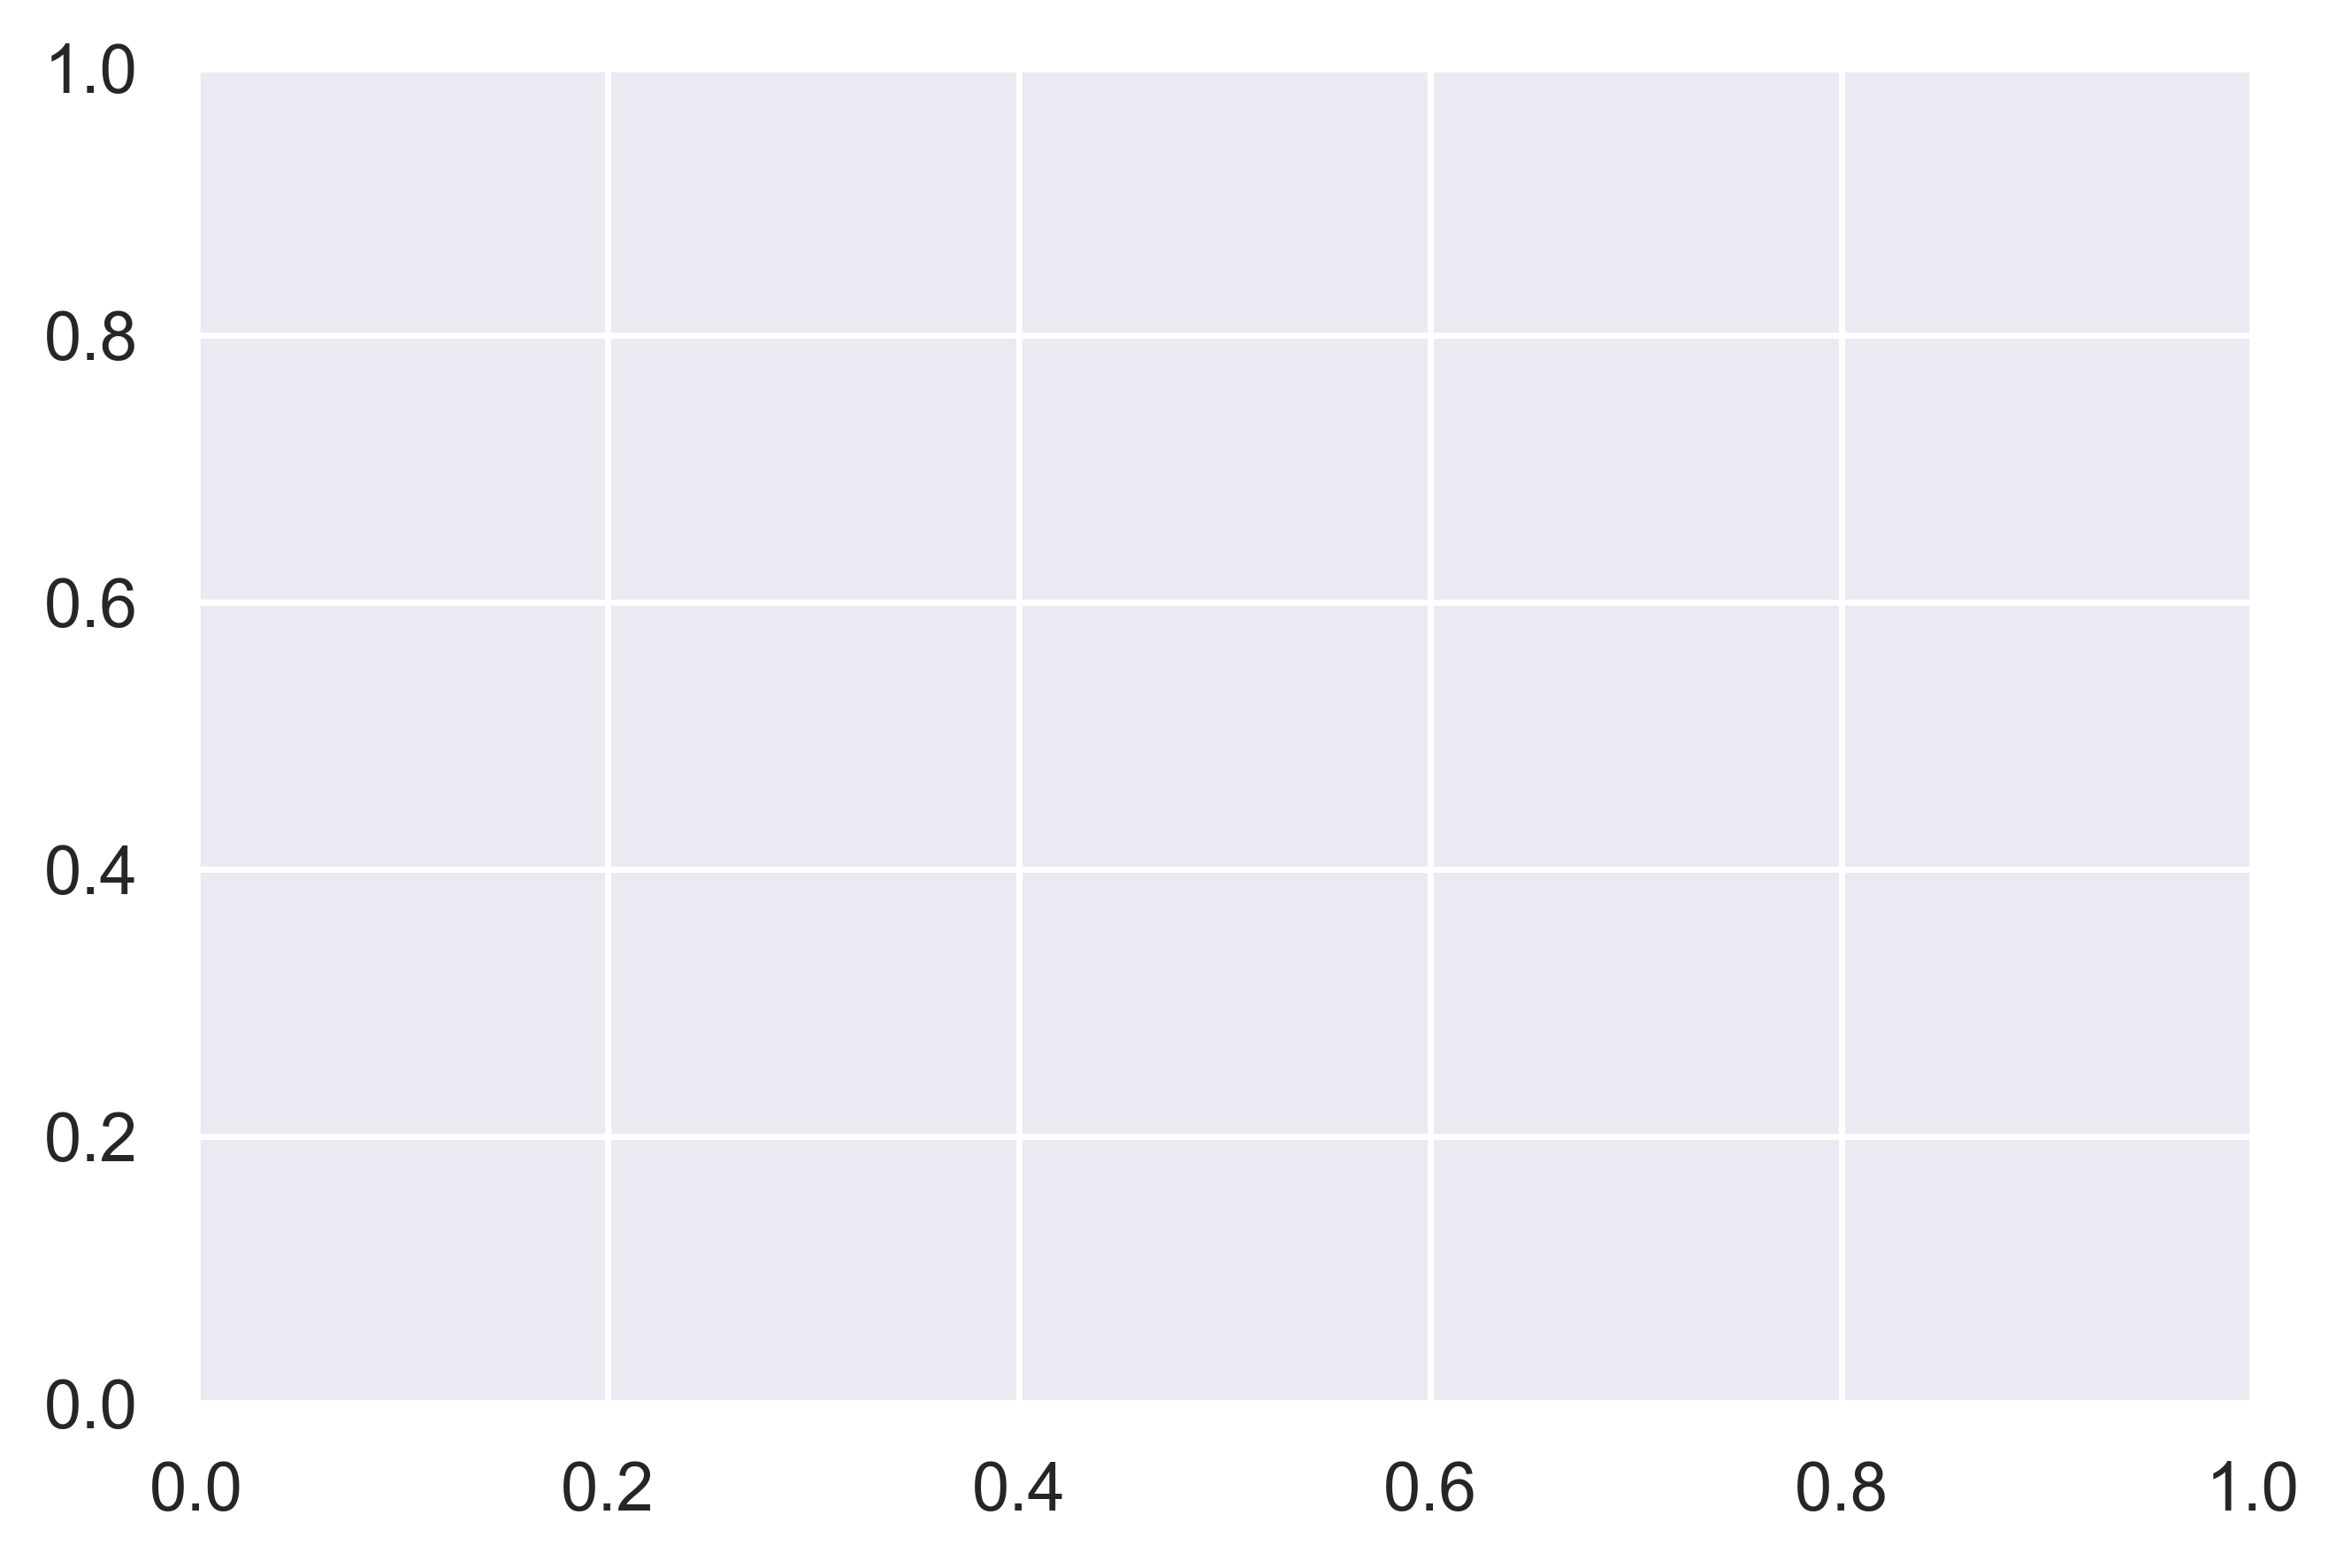

In [13]:
from parselmouth.praat import call
f0min=75
f0max=300
#pitch = call(snds, "To Pitch", 0.0, f0min, f0max)



In [28]:
import csv
with open ('Example.csv','w',newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    my_writer.writerows(pitch)

In [45]:
import pandas as pd

def facet_util(data, **kwargs):
    digit, speaker_id = data[['digit', 'speaker_id']].iloc[0]
    sound = parselmouth.Sound(r"C:\Users\sivakorn\Music\{}_{}.wav".format(digit, speaker_id))
    draw_spectrogram(sound.to_spectrogram())
    plt.twinx()
    draw_pitch(sound.to_pitch())
    # If not the rightmost column, then clear the right side axis
    if digit != 5:
        plt.ylabel("")
        plt.yticks([])

results = pd.read_csv(r"C:\Users\sivakorn\Downloads\digit_list.csv")

grid = sns.FacetGrid( row='speaker_id', col='digit')
grid.map_dataframe(facet_util)
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("time [s]", "frequency [Hz]")
grid.set(facecolor='white', xlim=(0, None))
plt.show()

TypeError: __init__() missing 1 required positional argument: 'data'